# Dataset summaries

L'obiettivo di questo notebook è quello di confrontare diversi dataset riguardanti società in attivo/fallimento

Librerie da installare

In [10]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

Inclusione delle librerie utilizzate

In [11]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

Variabili di gestione files

In [12]:
# Path of the directory containing .pkl files of the different datasets, can be changed
DATASETS_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output"

# True = export summary file in the OUTPUT_PATH
to_export = False

# Path of the output file report, can be changed
OUTPUT_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_reports"

In [13]:
# List containing all the datasets
dataset_list = []

# Find every pkl file in a certain directory
pkl_files = glob.glob(os.path.join(DATASETS_PATH, "*.pkl"))

for f in pkl_files:

    # Print the location and filename
    print('Location:', f)
    filename = f.split("\\")[-1]
    print('File Name:', filename)

    # Load the dataset from the pkl file
    dataset = pd.read_pickle(f)

    # Append the dataset to the list
    dataset_list.append((filename, dataset))

Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\active_out_big.pkl
File Name: active_out_big.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\active_out_small.pkl
File Name: active_out_small.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\active_raw.pkl
File Name: active_raw.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\bankruptcy_out_big.pkl
File Name: bankruptcy_out_big.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\bankruptcy_out_small.pkl
File Name: bankruptcy_out_small.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\bankruptcy_raw.pkl
File Name: bankruptcy_raw.pkl
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\complete_active_bankruptcy_big.pkl
File

Creo un piccolo dataset per raggruppare le statistiche

In [14]:
# Lists to save specific statistics of different datasets
filenames = []
sizes = []
amounts_active = []
amounts_bankruptcy = []
amounts_societa_capitali = []
amounts_societa_persone = []
amounts_societa_altro = []
amounts_dimensione_grandi = []
amounts_dimensione_medie = []
amounts_dimensione_piccole = []
amounts_number_features = []

# Iterate over each dataset couple and insert the different statistics inside the list
for dataset_couple in dataset_list:
    # Name of the file
    filename = dataset_couple[0]
    # Pandas dataset
    dataset = dataset_couple[1]
    # Amount of active companies
    amount_active = len(dataset[dataset["Legal Status"] == "Active"])
    # Amount of bankruptcy companies
    amount_bankruptcy = len(dataset[dataset["Legal Status"] == "Bankruptcy"])
    # Amount of "società di capitali"
    amount_societa_capitali = len(dataset[dataset["Legal Form"] == "Società di capitali"])
    # Amount of "società di persone"
    amount_societa_persone = len(dataset[dataset["Legal Form"] == "Società di persone"])
    # Amount of "altro"
    amount_societa_altro = len(dataset[dataset["Legal Form"] == "Altro"])
    # Amount of big companies
    amount_dimensione_grandi = len(dataset[dataset["Company Size"] == "Grandi"])
    # Amount of medium companies
    amount_dimensione_medie = len(dataset[dataset["Company Size"] == "Medie"])
    # Amount of small companies
    amount_dimensione_piccole = len(dataset[dataset["Company Size"] == "Piccole"])

    # Insert into the the specific list
    # Filename
    filenames.append(filename)
    # Amount of records
    sizes.append(dataset.shape[0])
    # Amount of active companies
    amounts_active.append(amount_active)
    # Amount of bankruptcy companies
    amounts_bankruptcy.append(amount_bankruptcy)
    # Amount of "società di capitali"
    amounts_societa_capitali.append(amount_societa_capitali)
    # Amount of "società di persone"
    amounts_societa_persone.append(amount_societa_persone)
    # Amount of "altro"
    amounts_societa_altro.append(amount_societa_altro)
    # Amount of big companies
    amounts_dimensione_grandi.append(amount_dimensione_grandi)
    # Amount of medium companies
    amounts_dimensione_medie.append(amount_dimensione_medie)
    # Amount of small companies
    amounts_dimensione_piccole.append(amount_dimensione_piccole)
    # Number of features
    amounts_number_features.append(dataset.shape[1] - 1)

In [15]:
# Create the summary dataset
dataset = pd.DataFrame()
dataset["Filenames"] = filenames
dataset["Sizes"] = sizes
dataset["Number of features"] = amounts_number_features

dataset["Amounts Active"] = amounts_active
dataset["Amounts Bankruptcy"] = amounts_bankruptcy

dataset["Ratios Active"] = (dataset["Amounts Active"] / dataset["Sizes"]).apply("{:.2%}".format)
dataset["Ratios Bankruptcy"] = (dataset["Amounts Bankruptcy"] / dataset["Sizes"]).apply("{:.2%}".format)

dataset["Amounts Società di capitali"] = amounts_societa_capitali
dataset["Amounts Società di persone"] = amounts_societa_persone
dataset["Amounts Altro"] = amounts_societa_altro

dataset["Ratios Società di capitali"] = (dataset["Amounts Società di capitali"] / dataset["Sizes"]).apply("{:.2%}".format)
dataset["Ratios Società di persone"] = (dataset["Amounts Società di persone"] / dataset["Sizes"]).apply("{:.2%}".format)
dataset["Ratios Altro"] = (dataset["Amounts Altro"] / dataset["Sizes"]).apply("{:.2%}".format)

dataset["Amounts Big"] = amounts_dimensione_grandi
dataset["Amounts Medium"] = amounts_dimensione_medie
dataset["Amounts Small"] = amounts_dimensione_piccole

dataset["Ratios Big"] = (dataset["Amounts Big"] / dataset["Sizes"]).apply("{:.2%}".format)
dataset["Ratios Medium"] = (dataset["Amounts Medium"] / dataset["Sizes"]).apply("{:.2%}".format)
dataset["Ratios Small"] = (dataset["Amounts Small"] / dataset["Sizes"]).apply("{:.2%}".format)

dataset.head(10)

,Filenames,Sizes,Number of features,Amounts Active,Amounts Bankruptcy,Ratios Active,Ratios Bankruptcy,Amounts Società di capitali,Amounts Società di persone,Amounts Altro,Ratios Società di capitali,Ratios Società di persone,Ratios Altro,Amounts Big,Amounts Medium,Amounts Small,Ratios Big,Ratios Medium,Ratios Small
0,active_out_big.pkl,1236429,56,1236429,0,100.00%,0.00%,1218310,14796,3323,98.53%,1.20%,0.27%,11998,37518,1186913,0.97%,3.03%,96.00%
1,active_out_small.pkl,591781,56,591781,0,100.00%,0.00%,586462,4610,709,99.10%,0.78%,0.12%,10188,33757,547836,1.72%,5.70%,92.57%
2,active_raw.pkl,1236429,31,1236429,0,100.00%,0.00%,1218310,14796,3323,98.53%,1.20%,0.27%,11998,37518,1186913,0.97%,3.03%,96.00%
3,bankruptcy_out_big.pkl,332050,56,0,332050,0.00%,100.00%,329038,1512,1500,99.09%,0.46%,0.45%,2674,11529,317847,0.81%,3.47%,95.72%
4,bankruptcy_out_small.pkl,231775,56,0,231775,0.00%,100.00%,230454,794,527,99.43%,0.34%,0.23%,2308,10565,218902,1.00%,4.56%,94.45%
5,bankruptcy_raw.pkl,332050,31,0,332050,0.00%,100.00%,329038,1512,1500,99.09%,0.46%,0.45%,2674,11529,317847,0.81%,3.47%,95.72%
6,complete_active_bankruptcy_big.pkl,1568479,21,1236429,332050,78.83%,21.17%,1547348,16308,4823,98.65%,1.04%,0.31%,14672,49047,1504760,0.94%,3.13%,95.94%
7,complete_active_bankruptcy_raw.pkl,1568479,31,1236429,332050,78.83%,21.17%,1547348,16308,4823,98.65%,1.04%,0.31%,14672,49047,1504760,0.94%,3.13%,95.94%
8,complete_active_bankruptcy_small.pkl,823556,21,591781,231775,71.86%,28.14%,816916,5404,1236,99.19%,0.66%,0.15%,12496,44322,766738,1.52%,5.38%,93.10%
9,filtered_active_bankruptcy_big_25.pkl,1207856,21,908518,299338,75.22%,24.78%,1191981,11862,4013,98.69%,0.98%,0.33%,10936,37939,1158981,0.91%,3.14%,95.95%


Plot delle diverse dimensioni

Text(0.5, 1.0, 'Dataset sizes comparison')

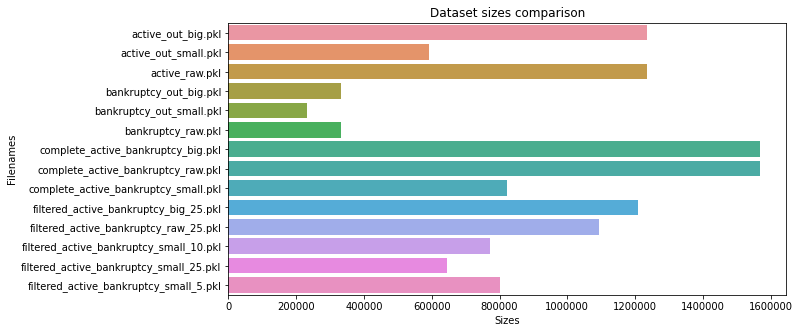

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
sns.barplot(x='Sizes', y='Filenames', data=dataset)
plt.title("Dataset sizes comparison")

Text(0.5, 1.0, 'Dataset number of features comparison')

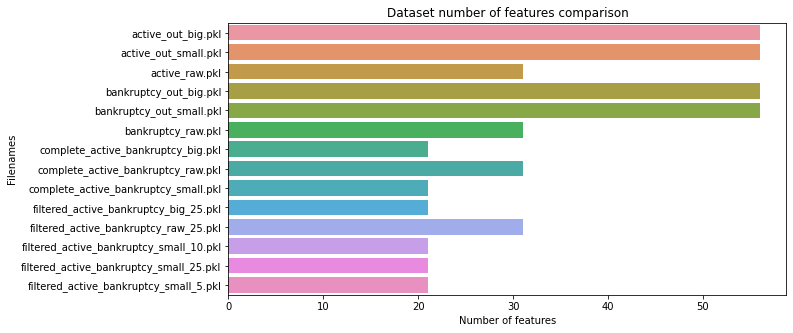

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
sns.barplot(x='Number of features', y='Filenames', data=dataset)
plt.title("Dataset number of features comparison")

Esporto come file excel

In [18]:
if to_export:
    dataset.to_excel(OUTPUT_PATH + "/datasets_summaries.xlsx")